In [18]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/isaiah/scisim/_isaiah_stuff/research')

import data_import
import pandas as pd
import numpy as np
from solvers.policy_iter import PolicyIteration 
from matplotlib import pyplot as plt

In [19]:
pd_data_5: pd.DataFrame = data_import.read_files_to_pd_dataframe(
    [f"../outs/5_by_5_grid/itr_{i}.xml.out" for i in range(50)]
)
# pd_data_6: pd.DataFrame = data_import.read_files_to_pd_dataframe(
#     [f"../outs/6_by_6_grid/itr_{i}.xml.out" for i in range(50)]
# )
# pd_data_7: pd.DataFrame = data_import.read_files_to_pd_dataframe(
#     [f"../outs/7_by_7_grid/itr_{i}.xml.out" for i in range(50)]
# )
# pd_data_8: pd.DataFrame = data_import.read_files_to_pd_dataframe(
#     [f"../outs/8_by_8_grid/itr_{i}.xml.out" for i in range(50)]
# )

In [20]:
# main_df = pd.concat([pd_data_5, pd_data_6, pd_data_7, pd_data_8], ignore_index=True)
main_df = pd_data_5
main_df['pi_solver'] = [
    PolicyIteration(main_df['Q'][i], main_df['b'][i], name=main_df['f_name'][i])
    for i in range(len(main_df))
]

In [21]:
for pi_solver in main_df['pi_solver']:
    pi_solver.solve(debug_logs=[])

In [22]:
def get_policy_from_ipopt(ipopt_sol: np.ndarray, tol = 1e-6):
    p = np.zeros(len(ipopt_sol))
    for i in range(len(ipopt_sol)):
        if abs(ipopt_sol[i]) > tol:
            p[i] = 1.0
    return p

def get_policy_diff(a: np.ndarray, b: np.ndarray):
    # return np.linalg.norm(a - b, 1) / len(a)
    return np.linalg.norm(a - b, 1)

def plot_convergence(trial_num: int) -> None:
    ipopt_policy = get_policy_from_ipopt(main_df['ipopt_sol'][trial_num])
    intermediate_policies = main_df['pi_solver'][trial_num].intermediate_policies
    intermediate_objective = main_df['pi_solver'][trial_num].intermediate_objective
    intermediate_policy_diffs = [ get_policy_diff(ip, ipopt_policy) for ip in intermediate_policies ]
    cycle_starts = main_df['pi_solver'][trial_num].cycle_starts

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('policy divergence from IPOPT (abs diff)', color=color)
    ax1.plot(intermediate_policy_diffs, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('objective', color=color)  # we already handled the x-label with ax1
    ax2.plot(intermediate_objective, color=color)
    ax2.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.axvline(cycle_starts, color='orange')
    plt.show()


# Convergence plots of PI solver V1 (until they hit a "cycle")
red = distance to ipopt policy
- we cannot calculate this line from inside the algo (ipopt gives us this)
- $||\pi_{itr} - \pi_{ipopt}||^2$ (so just sum of the policies that are "off")

blue = objective (LCP objective)
- this is what we have access to while running algo
- note: log scale

orange = where cycle begins

## Takeaways:

No strong conclusions can be made (i.e. there are counter examples for each point below)

- _generally_ cycle is small
- _generally_ the divergence from the actual policy is pretty small while in the cycle
  - "pretty small" == "better than the first couple iterations of the algorithm"
- movement in *LCP objective* closer related to divergence of policy to IPOPT policy than what I expected
  - off by 1 iteration because of some changes I made in code... now policy is updated before value

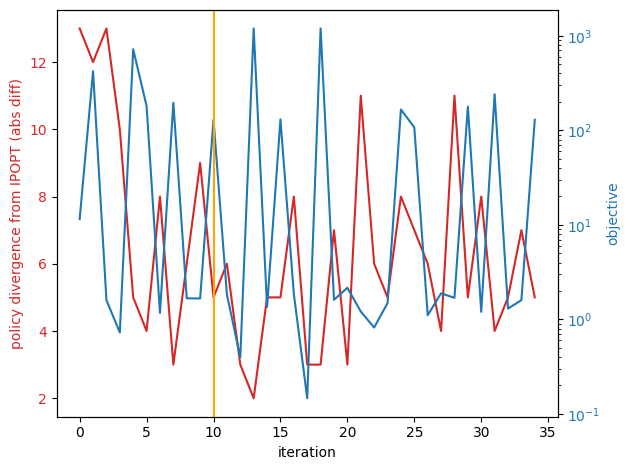

In [23]:
plot_convergence(0)

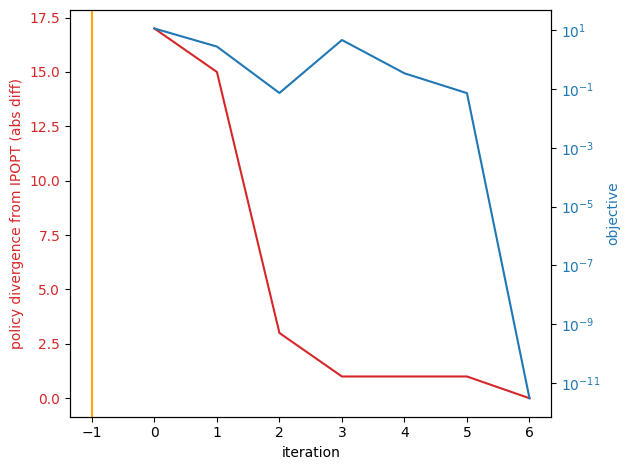

In [24]:
# 2 is a case where it converges in the python implementation, but not the c++ one.... interesting :/
# (this could be due to the differences in the inner-solver)
plot_convergence(2)

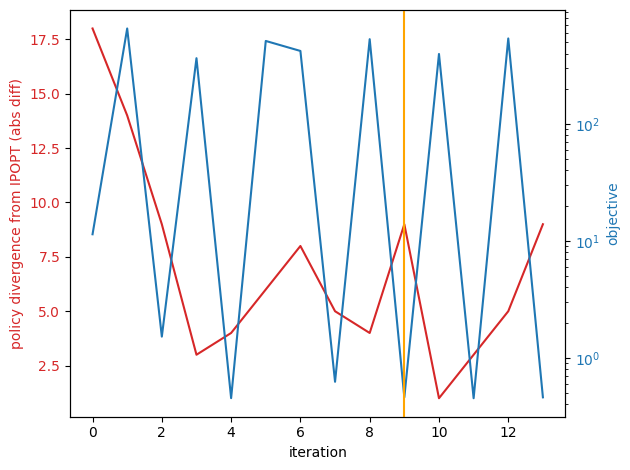

In [25]:
plot_convergence(10)

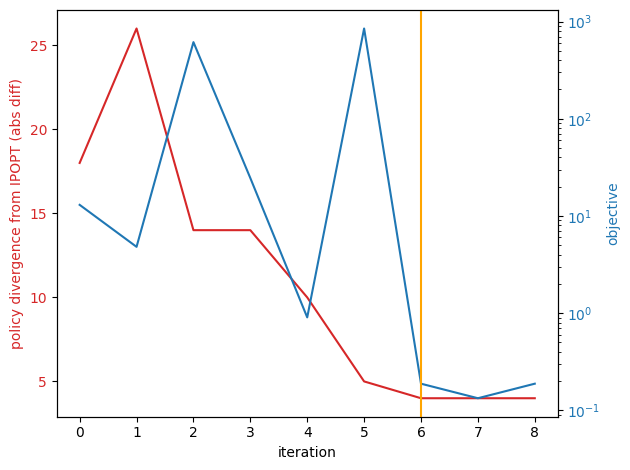

In [26]:
plot_convergence(12)

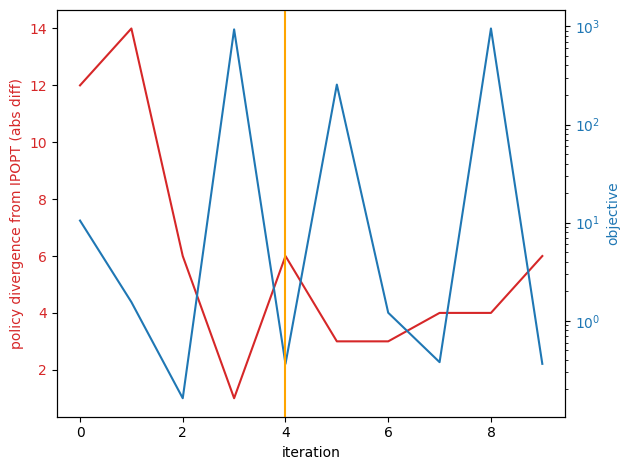

In [27]:
plot_convergence(16)

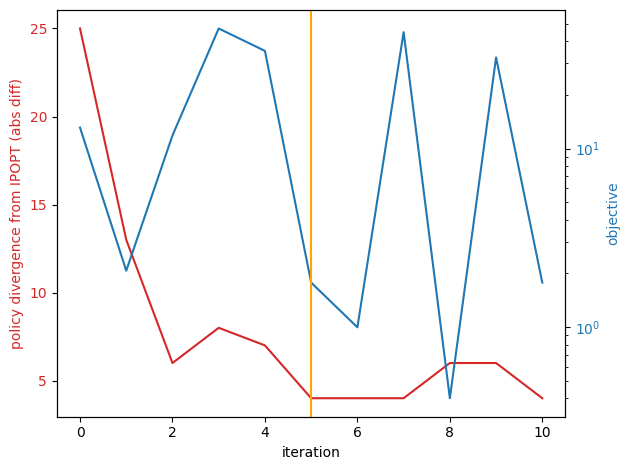

In [28]:
plot_convergence(17)

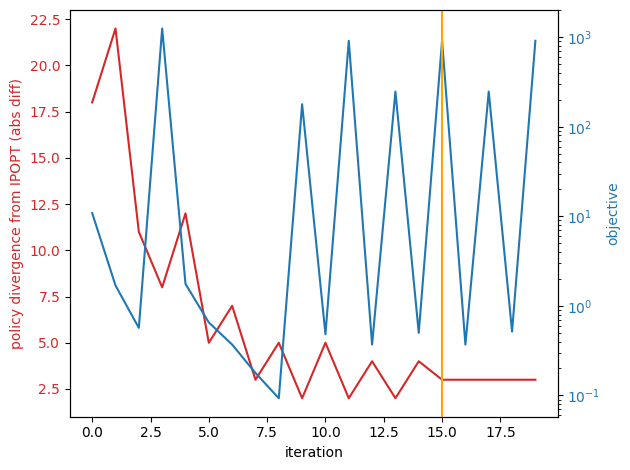

In [29]:
plot_convergence(24)

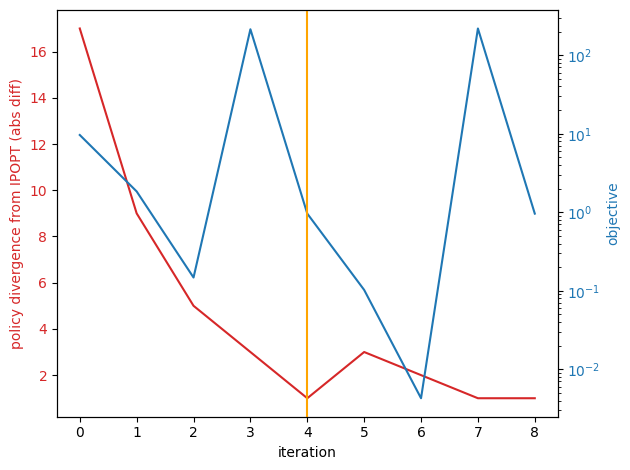

In [30]:

plot_convergence(28)

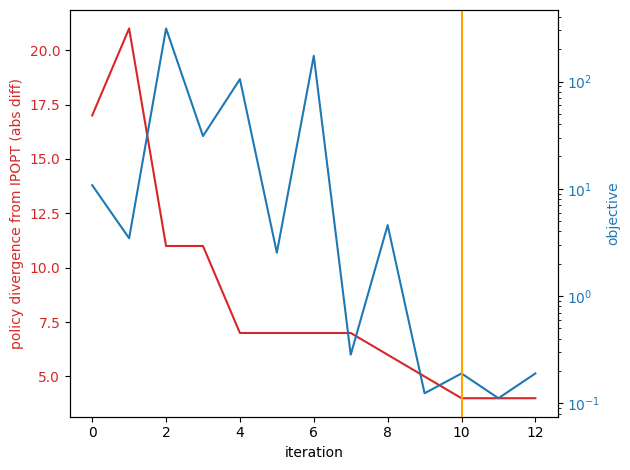

In [31]:

plot_convergence(32)

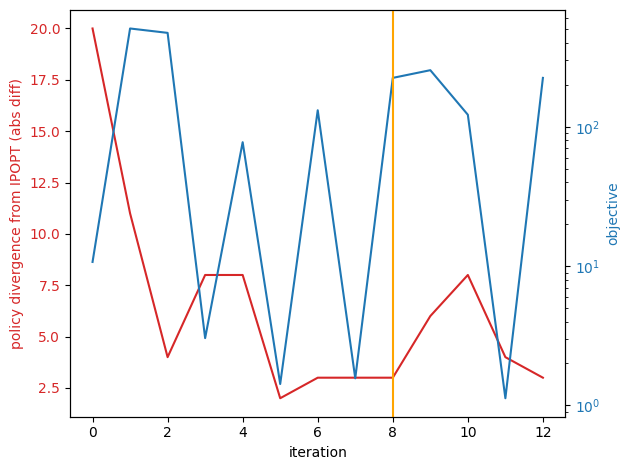

In [32]:

plot_convergence(38)

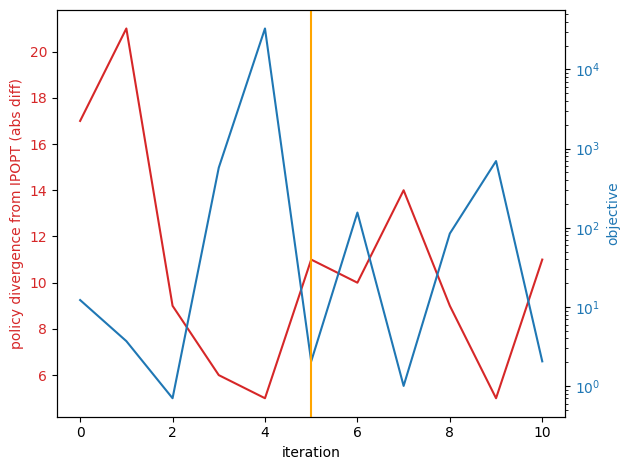

In [33]:

plot_convergence(41)

In [34]:

for i in range(50):
    if main_df['pi_solver'][i].cycle_starts != -1:
        print(i)

0
10
11
12
16
17
24
28
32
38
41
46
48
49
